## Import and load dataframe


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('weather_historic_data/TG_STAID025142.txt',
                 skiprows=20, parse_dates=['    DATE'])

In [3]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,25142,140154,1951-01-01,-59,0
1,25142,140154,1951-01-02,-9,0
2,25142,140154,1951-01-03,-2,0
3,25142,140154,1951-01-04,-5,0
4,25142,140154,1951-01-05,12,0
...,...,...,...,...,...
26232,25142,912210,2022-10-27,130,0
26233,25142,912210,2022-10-28,151,0
26234,25142,912210,2022-10-29,141,0
26235,25142,912210,2022-10-30,150,0


## Show certain rows


In [4]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,25142,140154,1951-01-11,31,0
11,25142,140154,1951-01-12,57,0
12,25142,140154,1951-01-13,25,0
13,25142,140154,1951-01-14,33,0
14,25142,140154,1951-01-15,19,0
15,25142,140154,1951-01-16,11,0
16,25142,140154,1951-01-17,8,0
17,25142,140154,1951-01-18,35,0
18,25142,140154,1951-01-19,32,0
19,25142,140154,1951-01-20,13,0


## Show certain columns


In [5]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [6]:
df['    DATE']

0       1951-01-01
1       1951-01-02
2       1951-01-03
3       1951-01-04
4       1951-01-05
           ...    
26232   2022-10-27
26233   2022-10-28
26234   2022-10-29
26235   2022-10-30
26236   2022-10-31
Name:     DATE, Length: 26237, dtype: datetime64[ns]

## Simple statistics and filtering


In [7]:
df_mean = df.loc[df['   TG'] != -9999]['   TG'].mean() / 10
df_max = df.loc[df['   TG'] != -9999]['   TG'].max() / 10
df_min = df.loc[df['   TG'] != -9999]['   TG'].min() / 10

In [8]:
print(f"Dataframe mean temp: {df_mean}")
print(f"Dataframe max temp: {df_max}")
print(f"Dataframe min temp: {df_min}")

Dataframe mean temp: 8.282134818601458
Dataframe max temp: 28.9
Dataframe min temp: -21.9


<Axes: >

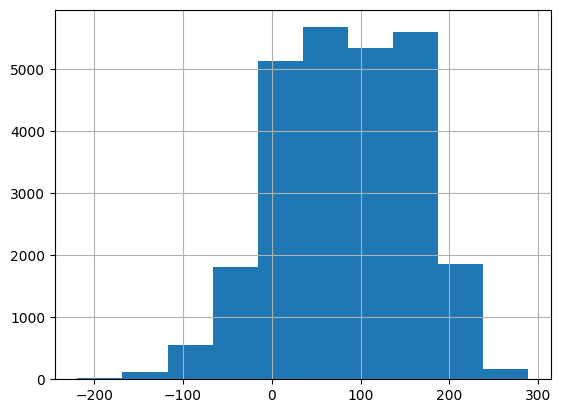

In [9]:
df_hist = df.loc[df['   TG'] != -9999]['   TG'].hist()
df_hist

## Get certain cells


In [10]:
selected_date = '1975-05-27'
selected_data = df.loc[df['    DATE'] == selected_date]
average_temp = selected_data['   TG'].mean() / 10
print(selected_data)
print(f"Average temperature on {selected_date}: {average_temp}")

      STAID   SOUID       DATE     TG   Q_TG
8912  25142  140154 1975-05-27    123      0
Average temperature on 1975-05-27: 12.3


In [11]:
selected_date = '1965-05-27'
selected_data = df.loc[df['    DATE'] == selected_date, '   TG'].squeeze()
average_temp = selected_data.max() / 10
print(selected_data)
print(f"Max temperature on {selected_date}: {average_temp}")

110
Max temperature on 1965-05-27: 11.0


## Calculate a new column out of exsisting column


In [12]:
df["TG0"] = df['   TG'].mask(df['   TG'] == -9999, np.nan)

In [13]:
df['TG'] = df['   TG'] / 10
df['Fahrenheit'] = df['TG'] * (9/5) + 32

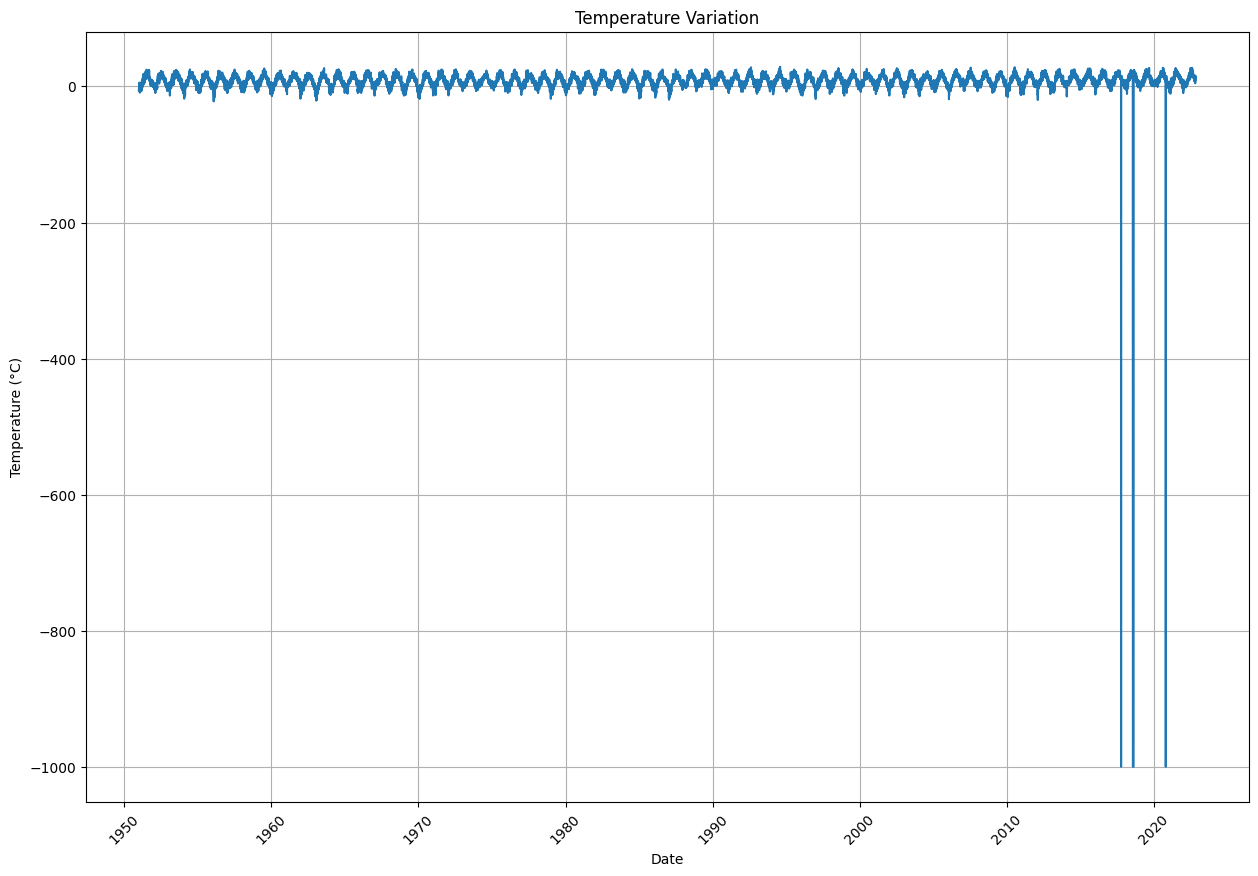

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(df['    DATE'], df['TG'])
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Variation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()